In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(32)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
# read in the data
fetal = pd.read_csv("artificial.csv")
fetal.head()

FileNotFoundError: [Errno 2] No such file or directory: 'artificial.csv'

In [4]:
# view the info of the dataset
fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          5400 non-null   float64
 1   accelerations                                           5400 non-null   float64
 2   fetal_movement                                          5400 non-null   float64
 3   uterine_contractions                                    5400 non-null   float64
 4   light_decelerations                                     5400 non-null   float64
 5   severe_decelerations                                    5400 non-null   float64
 6   prolongued_decelerations                                5400 non-null   float64
 7   abnormal_short_term_variability                         5400 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
# see the statistics of each feature
fetal.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,...,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,134.439205,0.002971,0.124530,0.005592,0.005093,0.000170,0.001282,48.997540,2.523413,28.185836,...,99.124742,168.175151,6.214892,1.851838,126.478422,128.966986,131.015478,66.390881,0.114074,2.000000
std,11.468614,0.003015,0.134988,0.003626,0.004576,0.000296,0.001402,17.833301,1.769347,25.917066,...,28.153000,23.181299,4.278056,2.186687,24.346059,21.853143,21.186372,62.513810,0.760642,0.816572
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,125.890095,0.000720,0.001000,0.002821,0.000563,0.000000,0.000000,34.000000,1.000000,1.745638,...,74.400701,151.000000,2.570033,0.000000,112.128997,115.273936,117.204948,13.000000,0.000000,1.000000
50%,134.126084,0.002452,0.068821,0.005186,0.004023,0.000000,0.000891,49.278056,2.000000,23.366807,...,100.546274,165.620389,5.572676,1.000706,131.000000,132.000000,134.000000,51.386799,0.000000,2.000000
75%,143.073499,0.004071,0.239087,0.008014,0.008881,0.000244,0.002243,63.000000,3.925111,48.509905,...,122.151855,183.392035,9.475529,2.601748,144.535207,145.000000,147.000000,95.140569,1.000000,3.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


<ipython-input-6-b31d7c17029b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fetal, x='fetal_health', palette='ocean_r')


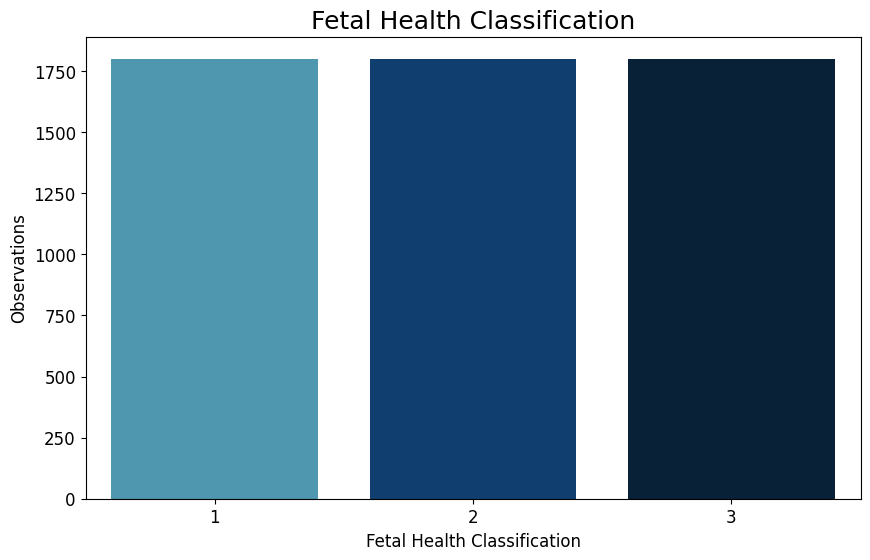

In [6]:
# Check balance of target variable.
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=fetal, x='fetal_health', palette='ocean_r')
plt.title('Fetal Health Classification', fontsize=18)
plt.xlabel('Fetal Health Classification', fontsize=12)
plt.ylabel('Observations', fontsize=12)
plt.show()

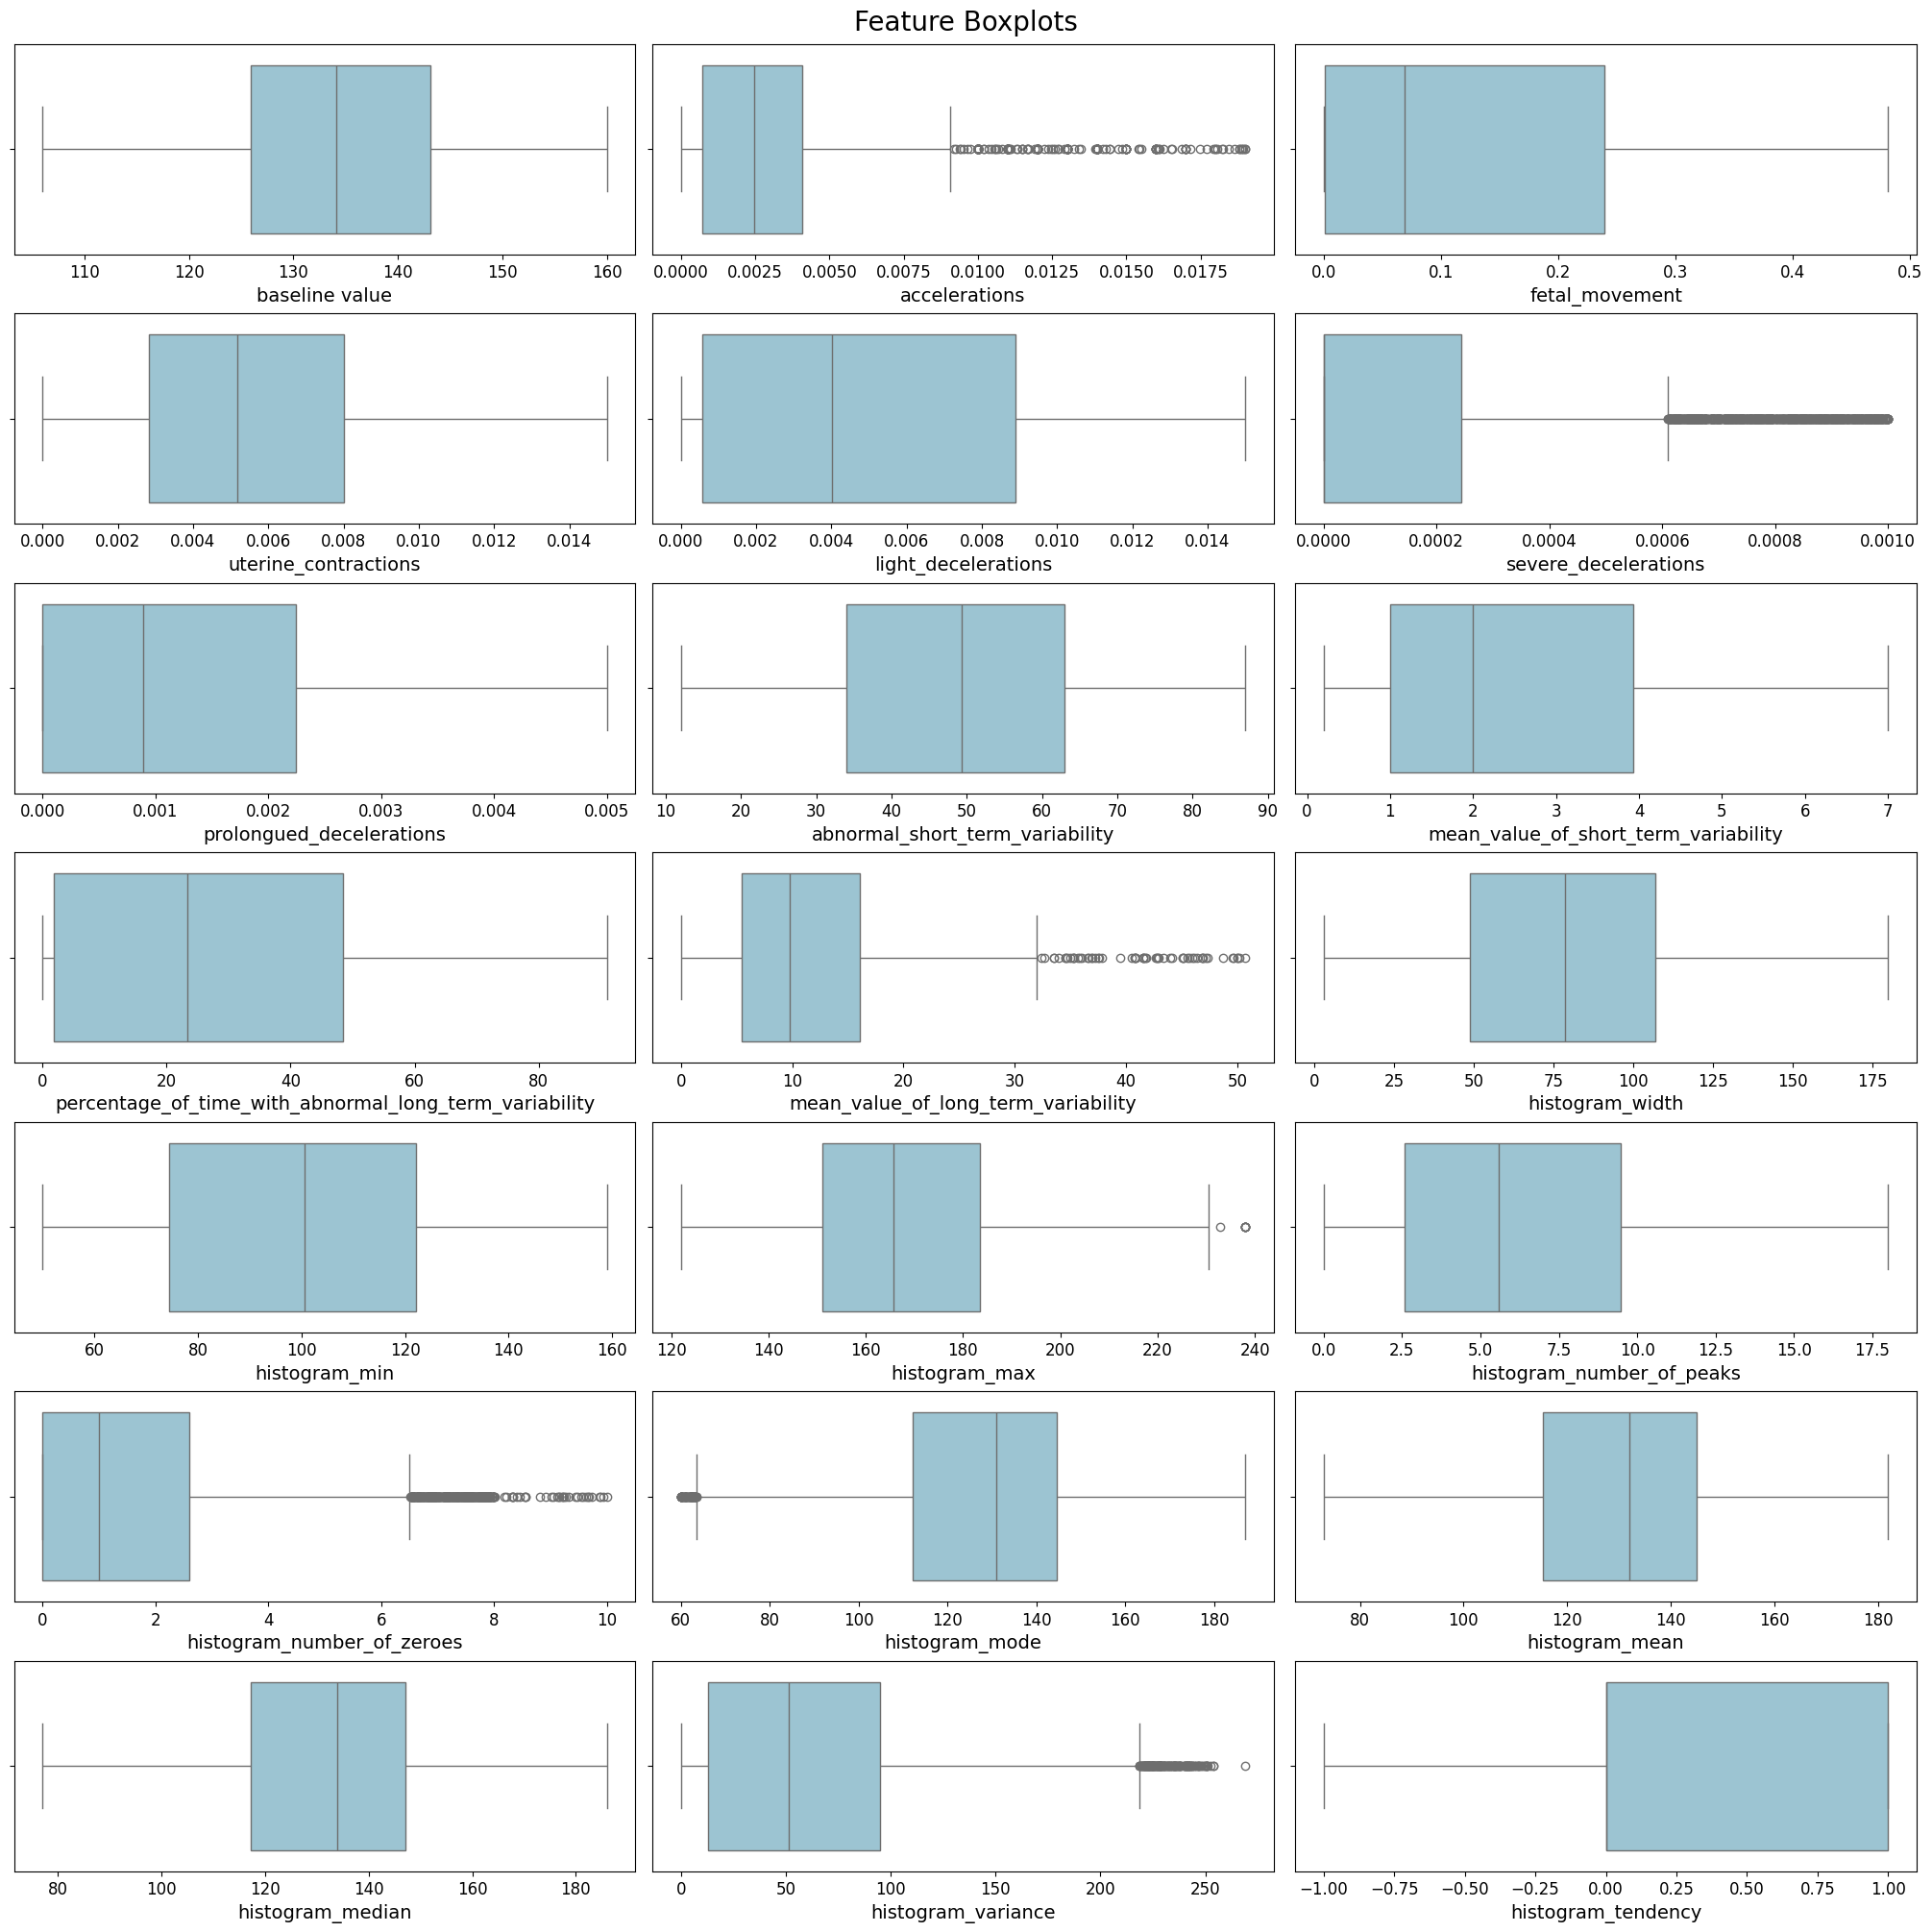

In [7]:
features = fetal.columns[:-1]
l,w = 7,3
plots = [ [i,j] for i in range(l) for j in range(w) ]
fig, axs = plt.subplots(nrows=l, ncols=w, constrained_layout=True, figsize=(20,20))
fig.suptitle('Feature Boxplots', fontsize=20)
for i in range(len(features)):
    j,k = plots[i]
    sns.boxplot(x=features[i], data=fetal, ax=axs[j,k], color='#93c9db')
plt.show()

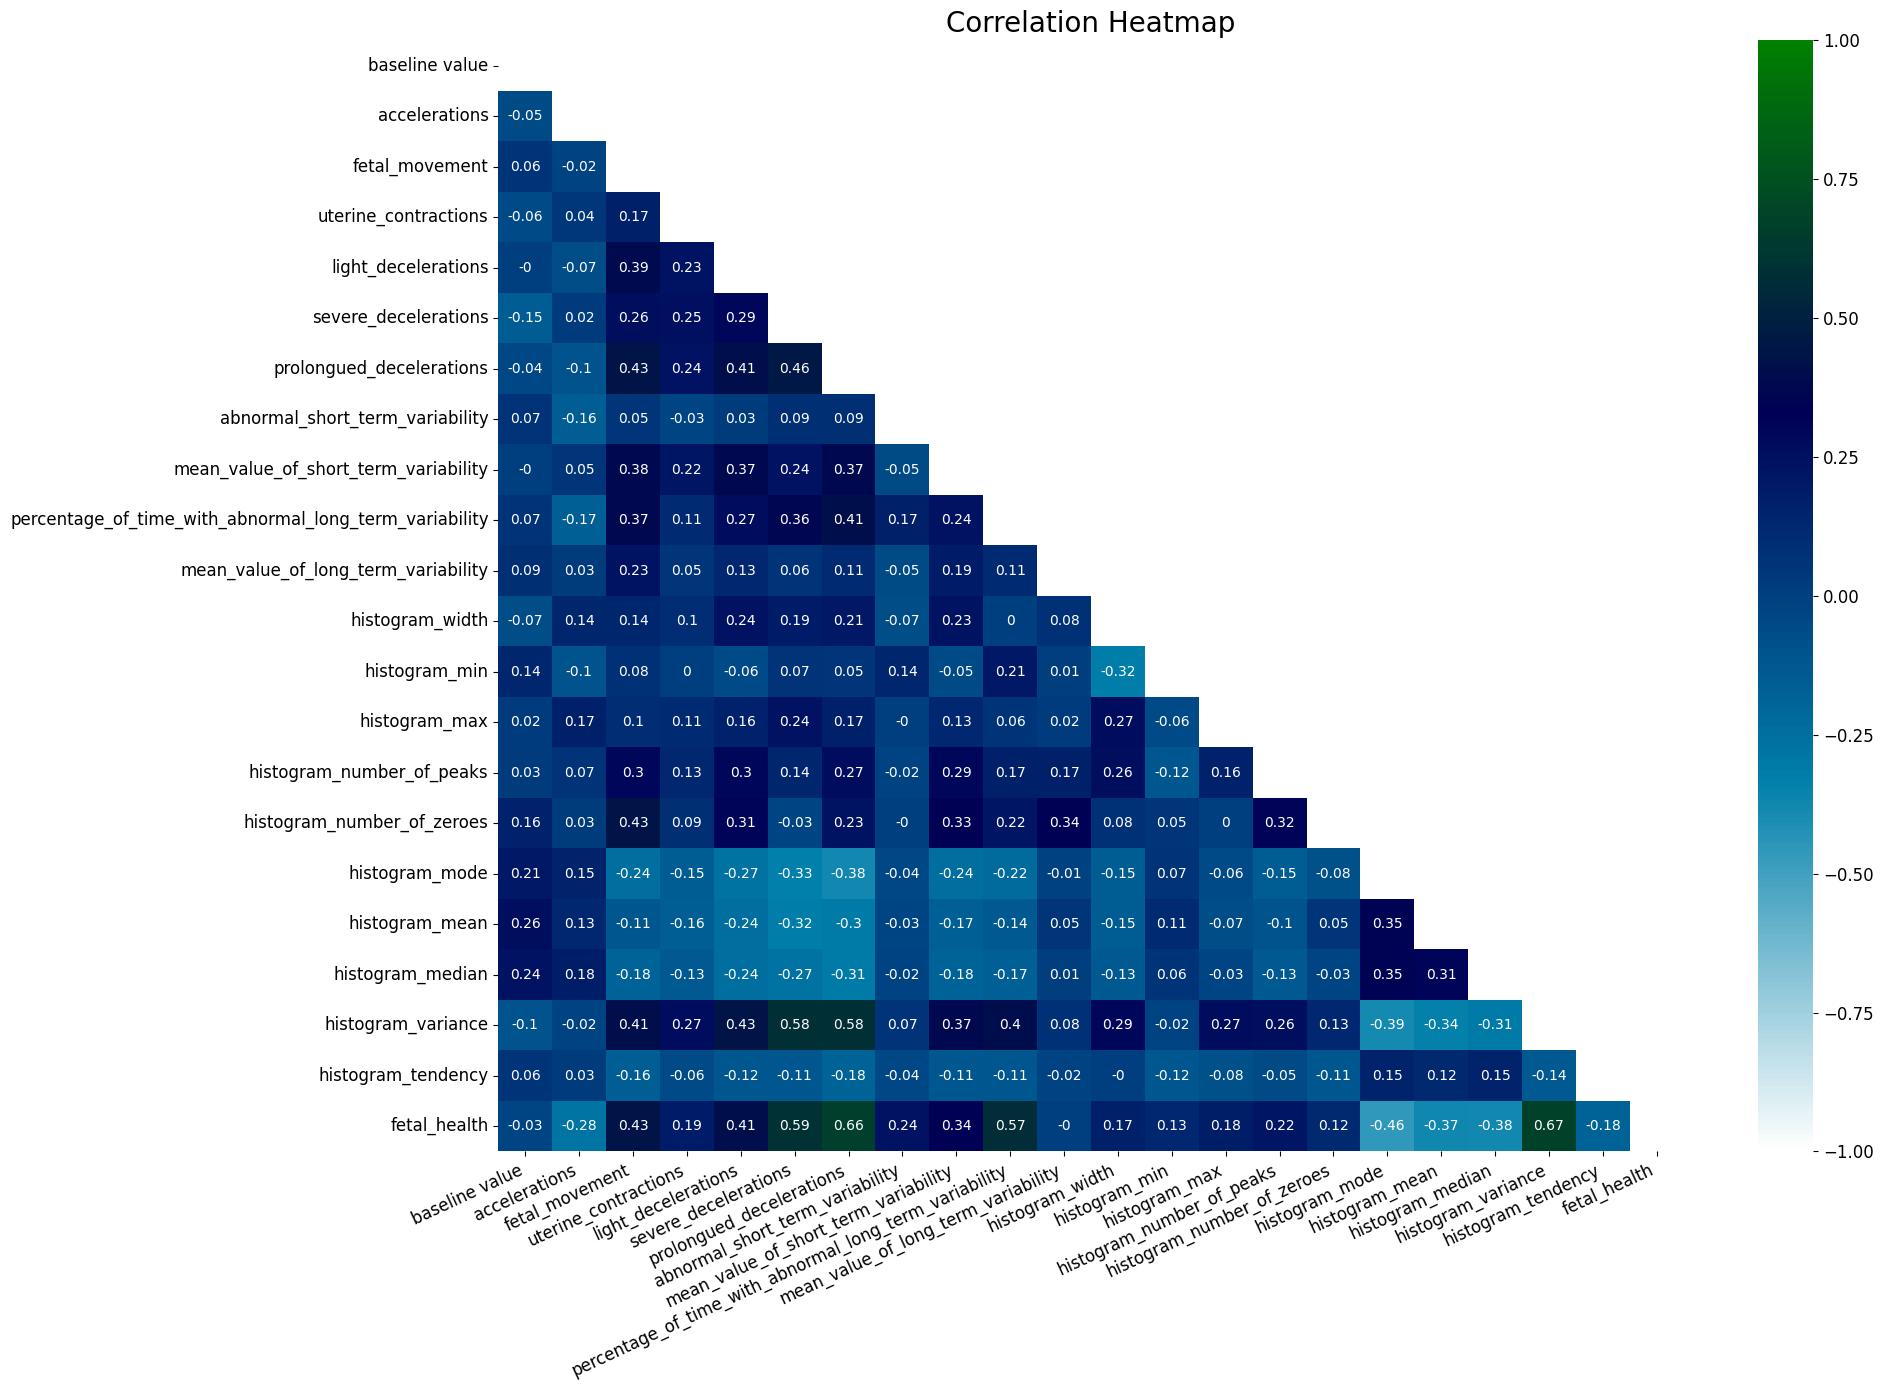

In [14]:
# Several features appear to be highly correlated to each other.
corr_matrix = fetal.corr()
fig, ax = plt.subplots(figsize=(20,14))
mask = np.zeros_like(corr_matrix, dtype=bool)   # returns an array of False values with same shape as corr dataframe
mask[np.triu_indices_from(mask)] = True  # creates a boolean mask by making half the zero values == True
ax = sns.heatmap(corr_matrix.round(2), mask=mask, ax=ax, annot=True, vmin=-1, vmax=1, annot_kws={'fontsize':10}, cmap='ocean_r')
ax.set_xticklabels(ax.xaxis.get_ticklabels())
ax.set_yticklabels(ax.yaxis.get_ticklabels())
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()

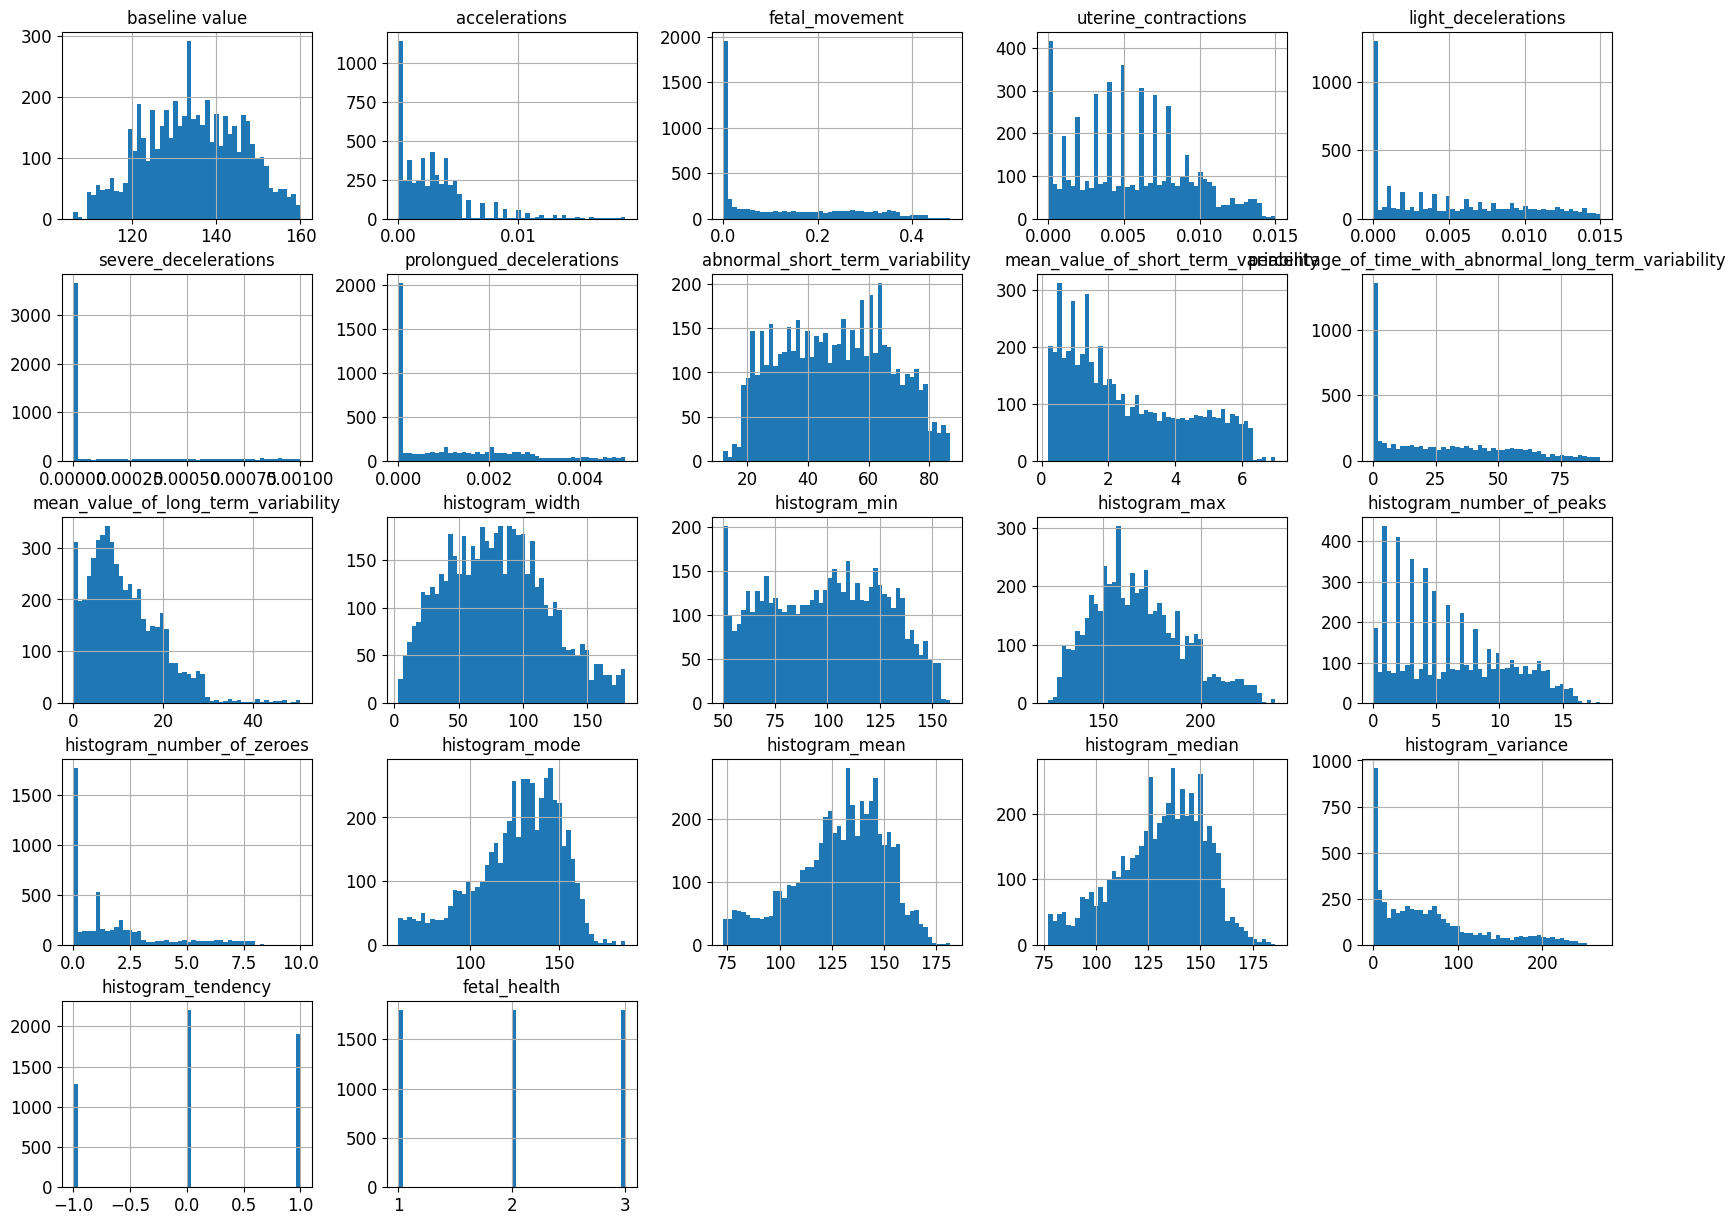

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
fetal.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
#ratio of healthy fetuses (represented by fetal_health = 1) in the dataset.
asdf = fetal.copy()
helthybois = asdf["fetal_health"]
acc = len(helthybois[helthybois==1])/len(helthybois)
print(acc)

0.3333333333333333


In [6]:
# split into training and testing dataset
train_set, test_set = train_test_split(fetal, test_size=0.2, random_state=42)
print(train_set.shape )
print(test_set.shape )

(4320, 22)
(1080, 22)


In [7]:
train_label = train_set['fetal_health'].copy()
train_set = train_set.drop(["fetal_health"], axis=1)
test_label = test_set['fetal_health'].copy()
test_set = test_set.drop(["fetal_health"], axis=1)

In [8]:
# pipeline for transforming the numeric variables
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [9]:
# pipeline for transforming the entire dataset
# in this case, we only have numeric variables in our dataset.

num_attribs = list(train_set)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

In [10]:
# transform the train_set and test_set
train_prepared = full_pipeline.fit_transform(train_set)
test_prepared = full_pipeline.transform(test_set)
print(train_prepared.shape)
print(test_prepared.shape)

(4320, 21)
(1080, 21)


Classification
We'll start by trying the ensemble learning model for classification:

This model will use several different classifiers and allow them to vote in order to classify an entry. Our classifiers will be Random Forest Classifier, Support Vector Machine, and Logistic Regression.

In [11]:
# Import necessary libraries for model creation and evaluation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.neighbors import KNeighborsClassifier  # For KNN classifier
from sklearn.linear_model import LogisticRegression  # For Logistic Regression classifier
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier  # For Random Forest, Voting, and Bagging classifiers
from sklearn.svm import SVC  # For Support Vector Classifier (SVC)
import xgboost as xgb  # For XGBoost classifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score  # For performance evaluation
import numpy as np  # For numerical operations


In [12]:
# We make the appropriate imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb  # Import XGBoost

# We are creating the model for each classifier
log_clf = LogisticRegression(solver="lbfgs", random_state=32)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=32)
svm_clf = SVC(gamma="scale", probability=True, random_state=32)
knn = KNeighborsClassifier(n_neighbors=1)
# Bagging Classifier with Logistic Regression
bag_log = BaggingClassifier(
    estimator=LogisticRegression(random_state=1),  # Use Logistic Regression as base estimator
    n_estimators=200,  # Number of base models (200)
    max_samples=100,  # Max samples per estimator
    bootstrap=True,  # Use bootstrapping for samples
    random_state=1  # Set random state for reproducibility
)
# Decision Tree
tree = DecisionTreeClassifier(random_state=42)  # Initialize Decision Tree classifier
# XGBoost Classifier

xgb_clf = xgb.XGBClassifier(random_state=42)  # Initialize XGBoost classifier
# We are creating the ensemble classifier that uses all the above classifiers
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

In [13]:
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

def clf_scores(y_actual, y_predict):
  conf = confusion_matrix(y_actual, y_predict) # get confusion matrix
  print("Confusion Matrix:\n", conf)
  recall = np.diagonal(conf) / (np.sum(conf,axis=1)) # recall of each class
  precision = np.diagonal(conf) / (np.sum(conf,axis=0)) # precision of each class
  f1 = 2*recall*precision / (precision + recall)
  print("Precision:\n", precision, "\nRecall:\n", recall, "\nF1 Score:\n", f1, "\n")
  return conf, recall, precision, f1

In [14]:
from sklearn.metrics import accuracy_score

# Train each model
print("Scoring Metrics for each Model:\n")
for clf in (log_clf, rnd_clf, svm_clf, voting_clf,knn,bag_log,tree):
    clf.fit(train_prepared, train_label)
    y_pred = clf.predict(test_prepared)
    print(clf.__class__.__name__, accuracy_score(test_label, y_pred))
    clf_scores(test_label, y_pred)

Scoring Metrics for each Model:

LogisticRegression 0.9268518518518518
Confusion Matrix:
 [[349  15  13]
 [ 22 321   8]
 [  8  13 331]]
Precision:
 [0.92084433 0.91977077 0.94034091] 
Recall:
 [0.92572944 0.91452991 0.94034091] 
F1 Score:
 [0.92328042 0.91714286 0.94034091] 

RandomForestClassifier 0.9740740740740741
Confusion Matrix:
 [[368   6   3]
 [ 11 338   2]
 [  1   5 346]]
Precision:
 [0.96842105 0.96848138 0.98575499] 
Recall:
 [0.97612732 0.96296296 0.98295455] 
F1 Score:
 [0.97225892 0.96571429 0.98435277] 

SVC 0.950925925925926
Confusion Matrix:
 [[360  12   5]
 [ 18 332   1]
 [  5  12 335]]
Precision:
 [0.93994778 0.93258427 0.98240469] 
Recall:
 [0.95490716 0.94586895 0.95170455] 
F1 Score:
 [0.94736842 0.93917963 0.96681097] 

VotingClassifier 0.9638888888888889
Confusion Matrix:
 [[363   9   5]
 [ 11 339   1]
 [  4   9 339]]
Precision:
 [0.96031746 0.94957983 0.9826087 ] 
Recall:
 [0.96286472 0.96581197 0.96306818] 
F1 Score:
 [0.9615894  0.95762712 0.97274032] 

KNeig

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import numpy as np
import xgboost as xgb

# Define the function to calculate evaluation metrics
def clf_scores(y_actual, y_predict):
    conf = confusion_matrix(y_actual, y_predict)  # Get confusion matrix
    print("Confusion Matrix:\n", conf)
    recall = np.diagonal(conf) / np.sum(conf, axis=1)  # Recall of each class
    precision = np.diagonal(conf) / np.sum(conf, axis=0)  # Precision of each class
    f1 = 2 * recall * precision / (precision + recall)  # F1 Score calculation
    print("Precision:\n", precision, "\nRecall:\n", recall, "\nF1 Score:\n", f1, "\n")
    return conf, recall, precision, f1

# Adjust class labels for both training and test datasets (shift to 0-based)
train_label_adjusted = train_label - 1  # Subtract 1 from each training label
test_label_adjusted = test_label - 1  # Subtract 1 from each test label

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model with adjusted labels
xgb_clf.fit(train_prepared, train_label_adjusted)

# Predict on the test data with adjusted labels
y_pred_xgb = xgb_clf.predict(test_prepared)

# Calculate and print the evaluation metrics
print("XGBoost Classifier Performance")
print("Accuracy:", accuracy_score(test_label_adjusted, y_pred_xgb))
clf_scores(test_label_adjusted, y_pred_xgb)


XGBoost Classifier Performance
Accuracy: 0.975
Confusion Matrix:
 [[364   9   4]
 [  8 340   3]
 [  1   2 349]]
Precision:
 [0.97587131 0.96866097 0.98033708] 
Recall:
 [0.96551724 0.96866097 0.99147727] 
F1 Score:
 [0.97066667 0.96866097 0.98587571] 



(array([[364,   9,   4],
        [  8, 340,   3],
        [  1,   2, 349]]),
 array([0.96551724, 0.96866097, 0.99147727]),
 array([0.97587131, 0.96866097, 0.98033708]),
 array([0.97066667, 0.96866097, 0.98587571]))

We observe that the individual Random Forest Classifier is better than every other model as well as the Voting Classifier

In [16]:
#AdaBoosting

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# We create the AdaBoost Classifier using Decision Tree
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=32)

# Train on the data
ada_clf.fit(train_prepared, train_label)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=32)

In [17]:
# Looking at accuracy of model
y_pred = ada_clf.predict(test_prepared)
print("Accuracy of Decision Tree Boosting: " + str(accuracy_score(test_label, y_pred)))
clf_scores(test_label, y_pred);

Accuracy of Decision Tree Boosting: 0.9064814814814814
Confusion Matrix:
 [[324  47   6]
 [ 10 339   2]
 [ 34   2 316]]
Precision:
 [0.88043478 0.87371134 0.97530864] 
Recall:
 [0.85941645 0.96581197 0.89772727] 
F1 Score:
 [0.86979866 0.91745602 0.93491124] 



It seems that singular Random-Forest Classifier outperforms all the other models. We will proceed with it and further optimize.

## Optimization
New Scoring Function for Optimization.
We begin by creating our own loss function for grid search to look for. Finding the best model is dependent on how "best" is defined. As our project concerns medical health, we insist that the recall must be high so that if fetal health is poor, it will not go undetected. We do not want any false negatives on the poor health classifiers. At the same time, however, we cannot let precision drop too low, so we define our new scoring function to be similar to the F1 score, but with more weight given to recall. The F1 formula is f1 = 2 / ( 1/p + 1/r ) for precision p and recall r. We define our unique scoring function:
f2 = ( 1 + a ) / ( 1/p + a*1/r )
which is the same as the f1 metric but with weight "a" applied to the recall term, so that recall will be made more important than precision for a > 1. Additionally, the precision and recall used in these formulas can be a weighted average of the recalls for each class, with more weight given to the unhealthy class.The f2 score will always be between 0 and 1 if the weight vector is normalized such that the components sum to 1.

F2 score metric, is used to evaluate a classification model. The F2 score emphasizes recall more than precision (with recall being weighted twice as much in this case). It calculates recall and precision for each class in the model's predictions, applies weights to the recall scores, and then combines them into the F2 score. This metric is useful when false negatives are more costly than false positives, and it’s wrapped in make_scorer to be used in model evaluation.

In [18]:
from sklearn.metrics import make_scorer

def f2(y, y_pred, **kwargs):
  a = 2 # adjust this for recall weight
  weights = np.array([1,1,2]) # adjust this for recall weight on each class
  weights = weights / np.sum(weights) # normalize weights; weights for direction, a for magnitude

  conf = confusion_matrix(y, y_pred) # get confusion matrix
  recall = np.diagonal(conf) / (np.sum(conf,axis=1)) # recall scores for each class
  precision = np.diagonal(conf) / (np.sum(conf,axis=0)) # precision scores for each class

  r = np.dot(weights, recall)  # weighted recall average
  p = np.mean(precision) # precision average
  f2 = ( 1 + a ) / ( 1/p + a*1/r ) # f2 formula
  return f2

f2_score = make_scorer(f2, greater_is_better=True)

# Random and Grid Searching Hyperparameters.

**Parameters being tuned include:**

n_estimators: The number of trees in the forest.
min_samples_split: The minimum number of samples required to split an internal node.
max_depth: The maximum depth of each tree.
min_samples_leaf: The minimum number of samples required to be at a leaf node.
max_features: The number of features to consider when looking for the best split.
max_leaf_nodes: The maximum number of leaf nodes in each tree.


---



1.   It defines a set of possible values for different model settings, like how many trees to use, how deep the trees should go, and more.
2.   It randomly tries 100 different combinations of these settings.
3.   It evaluates each combination using the F2 score (a performance metric).
4.   After testing, it prints the performance of each combination and shows the best settings found.







In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

forest_clf = RandomForestClassifier(random_state=32)

param_dist = {'n_estimators': randint(1,1000),
              'min_samples_split': randint(2,10),
              'max_depth': randint(1,250),
              'min_samples_leaf': randint(1,10),
              'max_features': randint(1,22),
              'max_leaf_nodes': randint(2,500)
              }
n_iter_search = 100

random_search = RandomizedSearchCV(forest_clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, scoring=f2_score)

random_search.fit(train_prepared, train_label)

cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(mean_score, params)

print("Best: ", random_search.best_params_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.9739292889307386 {'max_depth': 216, 'max_features': 12, 'max_leaf_nodes': 391, 'min_samples_leaf': 7, 'min_samples_split': 6, 'n_estimators': 959}
0.9684754488514388 {'max_depth': 89, 'max_features': 20, 'max_leaf_nodes': 254, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 602}
0.9562001309454438 {'max_depth': 4, 'max_features': 6, 'max_leaf_nodes': 236, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 466}
0.9418640542757462 {'max_depth': 4, 'max_features': 2, 'max_leaf_nodes': 420, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 555}
0.9771228405310779 {'max_depth': 83, 'max_features': 11, 'max_leaf_nodes': 470, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 101}
0.9721066753095938 {'max_depth': 186, 'max_features': 6, 'max_leaf_nodes': 251, 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 780}
0.9754485475630978 {'max_depth': 63, 'max_features': 12, 'max_leaf_nodes': 122, 'min_samples_leaf': 5, 'min_samples

### Grid Search for Hyperparameter Tuning of Random Forest Classifier

This code performs **Grid Search Cross-Validation** to find the best hyperparameters for the **Random Forest Classifier** model. The key steps include:

1. **Parameter Grid**: Defines a grid of hyperparameters to tune, including:
   - `n_estimators`: The number of trees in the forest.
   - `min_samples_split`: The minimum number of samples required to split a node.
   - `max_depth`: The maximum depth of the trees.
   - `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
   - `max_features`: The number of features to consider when looking for the best split.
   - `max_leaf_nodes`: The maximum number of leaf nodes in each tree.
2. **Grid Search**: Uses `GridSearchCV` to perform a full search over the specified parameter grid, with 5-fold cross-validation, optimizing the **F2 score**.
3. **Results**: After fitting the model, the grid search results are displayed, including the **mean test scores** for each parameter combination.
4. **Best Parameters**: Finally, it prints the hyperparameters that yielded the best performance.

The `GridSearchCV` helps automate the search for the best model configuration and optimizes the model's performance.


In [ ]:
from sklearn.model_selection import GridSearchCV
forest_clf = RandomForestClassifier(random_state=32)

param_grid = {'n_estimators': range(200, 350, 25),
              'min_samples_split': range(3,12,3),
              'max_depth': range(80,120,20),
              'min_samples_leaf': range(1,3),
              'max_features': range(6,16,2),
              'max_leaf_nodes': range(100,200,50)
              }

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring = f2_score, return_train_score=True)

grid_search.fit(train_prepared, train_label)

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  if mean_score > 1.2:
    print(mean_score, params)

print("Best Parameters: ", grid_search.best_params_)

# Optimized Random Forest Classifier
Trained with specific hyperparameters that have been tuned for optimization:

In [ ]:
#BEST MODEL
forest_clf = RandomForestClassifier(max_depth= 80, max_features= 8,
                                    max_leaf_nodes= 100, min_samples_leaf= 2,
                                    min_samples_split= 3, n_estimators= 325)

forest_clf.fit(train_prepared, train_label)

y_pred = forest_clf.predict(test_prepared)
print("Random Forest Accuracy: ", accuracy_score(test_label, y_pred))
best_scores = clf_scores(test_label, y_pred);

Compare to un-optimized:

In [ ]:
#Pre-optimization results for comparison
y_pred = rnd_clf.predict(test_prepared)
print(rnd_clf.__class__.__name__, accuracy_score(test_label, y_pred))
pre_opt_scores = clf_scores(test_label, y_pred);

In [ ]:
score_label = ["Confusion Matrix Difference", "Recall Difference", "Precision Difference", "F1 Score Difference"]
for i in range(len(best_scores)):
    print(score_label[i])
    print(best_scores[i]-pre_opt_scores[i])